In [1]:
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
(train_images,train_labels),(test_images,test_labels) = tf.keras.datasets.fashion_mnist.load_data()
train_images,test_images = train_images/255.0,test_images/255.0

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [7]:
train_images.shape

(60000, 28, 28)

In [8]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

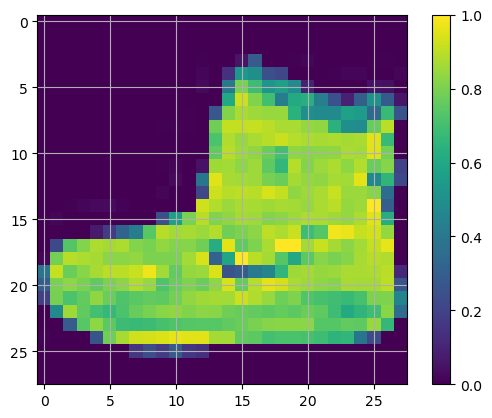

In [11]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(True)
plt.show()

In [12]:
train_images = train_images/255.0

In [13]:
test_images = test_images/255.0

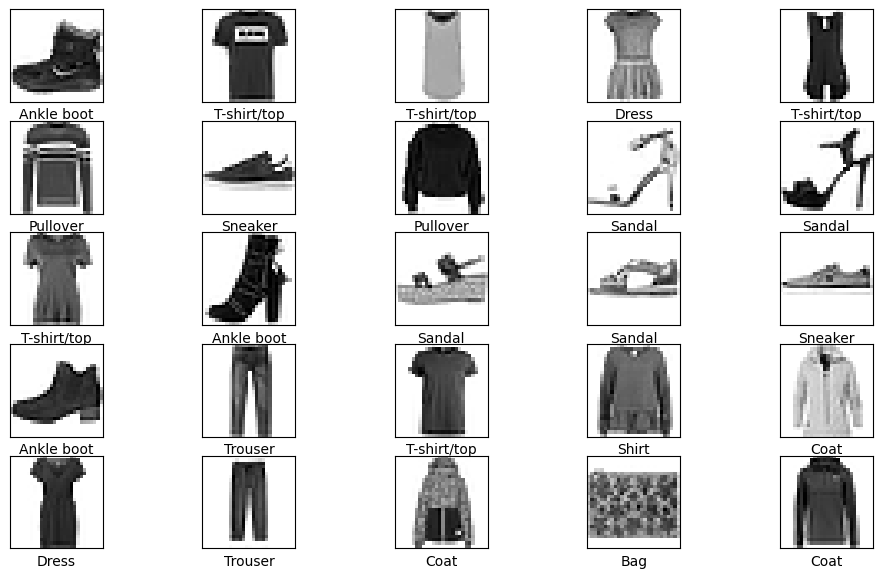

In [18]:
plt.figure(figsize = (12,7))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid()
    plt.imshow(train_images[i],cmap = plt.cm.binary)
    plt.xlabel(class_names[train_lables[i]])
plt.show()

In [19]:
train_images[0]

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000

In [20]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(128,activation = 'relu'),
    tf.keras.layers.Dense(10)
])

In [21]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True)

In [23]:
model.compile(optimizer = 'adam',
              loss = loss_fn,
              metrics = ['accuracy'])

In [25]:
model.fit(train_images,train_labels,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4811 - accuracy: 0.8300
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4666 - accuracy: 0.8353
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4542 - accuracy: 0.8403
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4443 - accuracy: 0.8426
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4356 - accuracy: 0.8468
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4284 - accuracy: 0.8497
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4220 - accuracy: 0.8510
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4160 - accuracy: 0.8538
Epoch 9/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.4108 - accuracy: 0.8560
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.405

In [27]:
test_loss,test_acc= model.evaluate(test_images,test_labels,verbose =2 )
print('test accuracy',test_acc)

313/313 - 1s - loss: 0.4425 - accuracy: 0.8425 - 1s/epoch - 4ms/step
test accuracy 0.8424999713897705


In [28]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [29]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 1s 3ms/step


In [30]:
predictions

array([2.5617388e-07, 2.0009445e-08, 3.9450019e-06, 3.7696932e-06,
       4.6747291e-06, 7.8413650e-02, 1.5733200e-05, 2.9382688e-01,
       3.2414785e-03, 6.2448961e-01], dtype=float32)

In [32]:
import numpy as np

In [37]:
np.argmax(predictions[0])

9

In [48]:
pr = model.predict(test_images)

313/313 [==============================] - 1s 3ms/step


In [49]:
np.argmax(pr[0])

9

In [ ]:
model.predict

In [44]:
predict = model(train_images[:1])
predict

<tf.Tensor: shape=(1, 10), dtype=float32, numpy=
array([[-11.381192  , -14.063855  ,  -9.637231  ,  -9.877381  ,
         -8.976852  ,   1.1225104 ,  -6.2848153 ,   4.32532   ,
         -0.14265205,   9.282036  ]], dtype=float32)>

In [46]:
tf.nn.softmax(predict).numpy()

array([[1.0540745e-09, 7.2078482e-11, 6.0292606e-09, 4.7420721e-09,
        1.1669774e-08, 2.8389657e-04, 1.7226597e-07, 6.9842916e-03,
        8.0113685e-05, 9.9265152e-01]], dtype=float32)

In [38]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

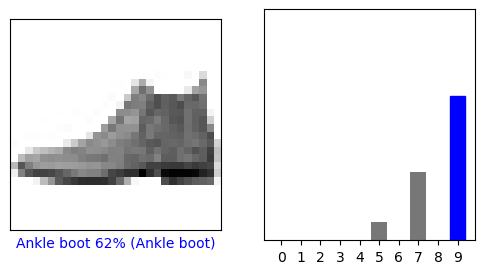

In [50]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

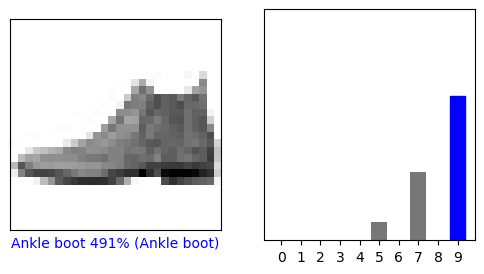

In [51]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, pr[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

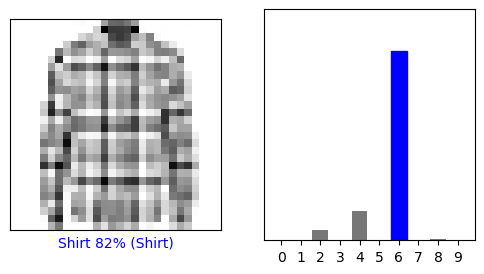

In [41]:
i = 7
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

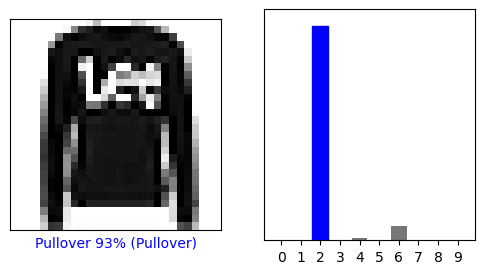

In [40]:
i = 1
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()